# Trying to see how I can figure out the Region of Interest

In [ ]:
## Setting up dependecies in the environment 
%pip install opencv-python matplotlib 
import cv2
import numpy as np
import matplotlib.pyplot as plt


  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.7/56.7 MB 46.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 39.7 MB/s eta 0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 30.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 42.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 35.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


### TECH NOTE(OPEN CV)
1. When you read an image using open cv, it gets stored as a numpy array(2-D matrix in case of grayscale image)
2. The shape of image is (height, widht)
3. The X-axis(horizontal) and Y-axis(vertical) begin at the top left corner.<br> 
X-axis extends rightward and Y-axis extends downwards.<br>
Therefore, image[20, 30] refers to the 20th row (Y-axis) and the 30th column (X-axis) of the image, starting from the top-left corner.



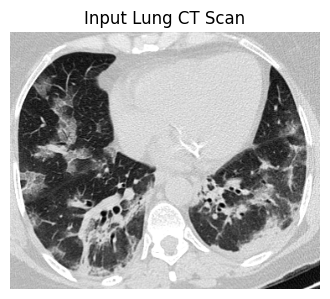

In [196]:
## Step 1 of 7: Loading an Image
# Path to the image file(Replace with the image path on your system)
image_path = "/Users/manpreetsingh/Downloads/UMBC/SEM-2/Cryptography-652/Project/652_Project_Code/watermarking-attack/datasets/ctscan/raw/COVID/Covid (10).png"  

# Read the image in grayscale
input_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if image was successfully loaded
if input_image is None:
    raise ValueError("Image not found or path is incorrect.")

# Displaying the image
plt.figure(figsize=(4, 4)) # Creates a new figure/ sets a canvas to draw on.
plt.imshow(input_image, cmap='gray') # Loads the image stored as numpy array in "input_image", using the grayscale colormap
plt.title("Input Lung CT Scan")#Adds Title above the image
plt.axis('off')# Hides the X and Y axis
plt.show()# Renders the figure for displaying in the notebook

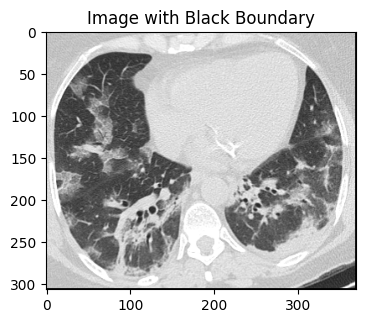

In [197]:
## Step 2 of 7: Drawing a black Boundary on the input image
# Make a copy of the input image so we don't overwrite the original
image_boundary = input_image.copy()

# Drawing a black border (1 pixel wide) on all sides of the image by putting the intensity to 0(Black)
image_boundary[0, :] = 0             # Top row
image_boundary[-1, :] = 0            # Bottom row
image_boundary[:, 0] = 0             # Left most column
image_boundary[:, -1] = 0            # Right most column

# Display the image with the black boundary
plt.figure(figsize=(4, 4))
plt.imshow(image_boundary, cmap='gray')
plt.title("Image with Black Boundary")
# plt.axis('off')
plt.show()


Otsu's Threshold (Tfinal): 149.0


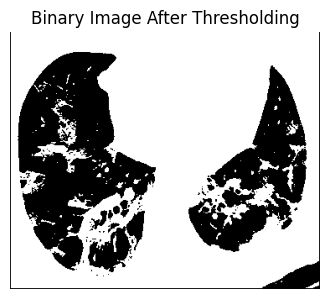

In [198]:
## Step 3 of 7: Use OpenCV's built-in Otsu's method to compute threshold
## Step 4 of 7: Turn all pixels greater than T_final white
# cv2.threshold returns both threshold and the binarized image
# All pixels > Tfinal → 255 (white), else → 0 (black)
T_final, binarized_image  = cv2.threshold(
    image_boundary,      # Input image (must be grayscale)
    0,             # Initial threshold value (ignored when using Otsu)
    255,           # Max value to use in binary thresholding
    cv2.THRESH_BINARY + cv2.THRESH_OTSU #Tells opencv to perform binary thresholding with otsu's method
)

print(f"Otsu's Threshold (Tfinal): {T_final}")

#Displaying the binarized result
plt.figure(figsize=(4, 4))
plt.imshow(binarized_image, cmap='gray')
plt.title("Binary Image After Thresholding")
plt.axis('off')
plt.show()


In [199]:
"""
## Step 5 of 7 Find the seed pixel
# The lungs are dark, and were kept black (0) after binarization.
#We're looking for the first black pixel that is just inside the bright boundary — that’s your seed.

# Get height and width of the image
h, w = binarized_image.shape
print(f"shape of the image:-(Height, Width)={h},{w}")
#Initial position of the seed
seed = None

#Go through everything inside the artificial black border that we drew in step 2, starting from top left most pixel inside the boundary then moving across that entire row
for y in range(1, h - 1): #Skipping the top and last row
    for x in range(1, w - 1):#Skipping the left and right most column
        
        pixel_val = binarized_image[y, x]
        
        # Check if it's a black pixel (inside lung) AND not on the border
        if pixel_val == 0:
            #Extra safety check that the seed is not even on the 1 pixel border on the inner edge of the black boundary
            if not (x == 1 or y == 1 or x == w-2 or y == h-2):
                seed = (y, x)
                break #breaks the inner loop
    if seed:
        break #Breaks the outer loop

if seed:
    print(f"Found seed pixel at (row={seed[0]}, col={seed[1]}) with value {binarized_image[seed]}")
else:
    print("Seed pixel not found.")
"""


'\n## Step 5 of 7 Find the seed pixel\n# The lungs are dark, and were kept black (0) after binarization.\n#We\'re looking for the first black pixel that is just inside the bright boundary — that’s your seed.\n\n# Get height and width of the image\nh, w = binarized_image.shape\nprint(f"shape of the image:-(Height, Width)={h},{w}")\n#Initial position of the seed\nseed = None\n\n#Go through everything inside the artificial black border that we drew in step 2, starting from top left most pixel inside the boundary then moving across that entire row\nfor y in range(1, h - 1): #Skipping the top and last row\n    for x in range(1, w - 1):#Skipping the left and right most column\n        \n        pixel_val = binarized_image[y, x]\n        \n        # Check if it\'s a black pixel (inside lung) AND not on the border\n        if pixel_val == 0:\n            #Extra safety check that the seed is not even on the 1 pixel border on the inner edge of the black boundary\n            if not (x == 1 or y 

In [200]:
## Step 5 of 7 Find the seed pixel
# The lungs are dark, and were kept black (0) after binarization.
#We're looking for the first black pixel that is just inside the bright boundary — that’s your seed.

# Get image center row
mid_row = binarized_image.shape[0] // 2

# Leave a 1-pixel margin on both sides to avoid boundary pixels
margin = 1

# Scan from left to right (skipping margin) to find a black pixel for left lung
for x in range(margin, binarized_image.shape[1] // 2):
    if binarized_image[mid_row, x] == 0:
        left_seed = (mid_row, x)
        print("Left lung seed found at:", left_seed)
        break

# Scan from right to left (skipping margin) to find a black pixel for right lung
for x in range(binarized_image.shape[1] - 1 - margin, binarized_image.shape[1] // 2, -1):
    if binarized_image[mid_row, x] == 0:
        right_seed = (mid_row, x)
        print("Right lung seed found at:", right_seed)
        break




Left lung seed found at: (153, 11)
Right lung seed found at: (153, 352)


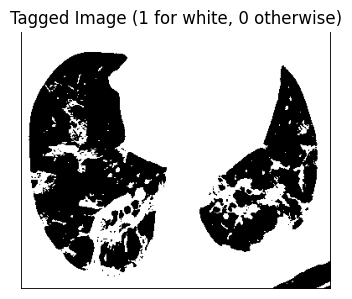

In [201]:
## Step 6: Create a tag image
"""
Syntax: np.where(condition, value_if_true, value_if_false)
np.where automatically checks the given condition for each element of the numpy array, and return a new array with updated values according to the conditions
Then .astype converts values of the return numpy array from integers to 8-bit unsigned integers(which is the standard usage for grayscale images)
"""
tagged_image = np.where(binarized_image == 255, 1, 0).astype(np.uint8)

plt.figure(figsize=(4, 4))
plt.imshow(tagged_image, cmap='gray')
plt.title("Tagged Image (1 for white, 0 otherwise)")
plt.axis('off')
plt.show()

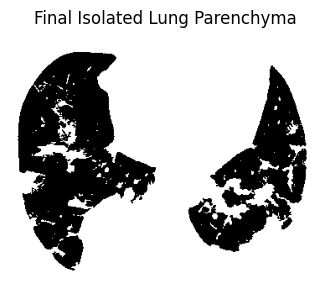

In [202]:
## Step 7 of 7: Region Growing from Seed
# Basically starts at a seed and expands to make the successive neighbours black, which were black in the tagged_image

# Making a copy of the image with every pixel set to white in the begining
result_image = np.ones_like(binarized_image, dtype=np.uint8) * 255

# Creating a mask to keep track of visited pixels, initially all values are set to "False"
visited = np.zeros_like(tagged_image, dtype=bool)

# 4-connected neighbors (above, below, left, right)
neighbors = [(-1, 0), (1, 0), (0, -1), (0, 1)]

# Queue for region growing (BFS)
from collections import deque
for seed in [left_seed, right_seed]:
    queue = deque([seed])
    visited[seed] = True

    while queue:
        y, x = queue.popleft()
        result_image[y, x] = 0

        for dy, dx in neighbors:
            ny, nx = y + dy, x + dx
            if (0 <= ny < result_image.shape[0]) and (0 <= nx < result_image.shape[1]):
                if not visited[ny, nx] and tagged_image[ny, nx] == 0:
                    queue.append((ny, nx))
                    visited[ny, nx] = True

# Show the result
plt.figure(figsize=(4, 4))
plt.imshow(result_image, cmap='gray')
plt.title("Final Isolated Lung Parenchyma")
plt.axis('off')
plt.show()





In [203]:
"""
## Step 7 of 7: Region Growing from Seed
# Basically starts at a seed and expands to make the successive neighbours black, which were black in the tagged_image

# Making a copy of the image with every pixel set to white in the begining
result_image = np.ones_like(binarized_image, dtype=np.uint8) * 255

# Creating a mask to keep track of visited pixels, initially all values are set to "False"
visited = np.zeros_like(tagged_image, dtype=bool)

# 4-connected neighbors (above, below, left, right)
neighbors = [(-1, 0), (1, 0), (0, -1), (0, 1)]

# Queue for region growing (BFS)
from collections import deque
queue = deque([seed]) #we create a double ended queue using deque and initialize it by adding seed as its element 
visited[seed] = True # We also set the seed coordinate to True in the visited numpy array


while queue:#Runs till queue gets empty
    y, x = queue.popleft()#Removes and returns item from the beginning of the queue

    # Setting visiting popped element to zero
    result_image[y, x] = 0

    #Goes through all 4 neighbours fo the seed in each iteration
    for dy, dx in neighbors:
        ny, nx = y + dy, x + dx # current neighbour coordinates
        if (0 <= ny < result_image.shape[0]) and (0 <= nx < result_image.shape[1]):#Bounds check, just sees that the current pixel/neighbour being inspected is part of the image
            if not visited[ny, nx] and tagged_image[ny, nx] == 0:#If this neighbour has not been visited before and it is black in the tagged imaged 
                queue.append((ny, nx))# Add it to the double ended queue
                visited[ny, nx] = True# And mark it as visited

# Show the result
plt.figure(figsize=(4, 4))
plt.imshow(result_image, cmap='gray')
plt.title("Final Isolated Lung Parenchyma")
plt.axis('off')
plt.show()
"""

'\n## Step 7 of 7: Region Growing from Seed\n# Basically starts at a seed and expands to make the successive neighbours black, which were black in the tagged_image\n\n# Making a copy of the image with every pixel set to white in the begining\nresult_image = np.ones_like(binarized_image, dtype=np.uint8) * 255\n\n# Creating a mask to keep track of visited pixels, initially all values are set to "False"\nvisited = np.zeros_like(tagged_image, dtype=bool)\n\n# 4-connected neighbors (above, below, left, right)\nneighbors = [(-1, 0), (1, 0), (0, -1), (0, 1)]\n\n# Queue for region growing (BFS)\nfrom collections import deque\nqueue = deque([seed]) #we create a double ended queue using deque and initialize it by adding seed as its element \nvisited[seed] = True # We also set the seed coordinate to True in the visited numpy array\n\n\nwhile queue:#Runs till queue gets empty\n    y, x = queue.popleft()#Removes and returns item from the beginning of the queue\n\n    # Setting visiting popped eleme